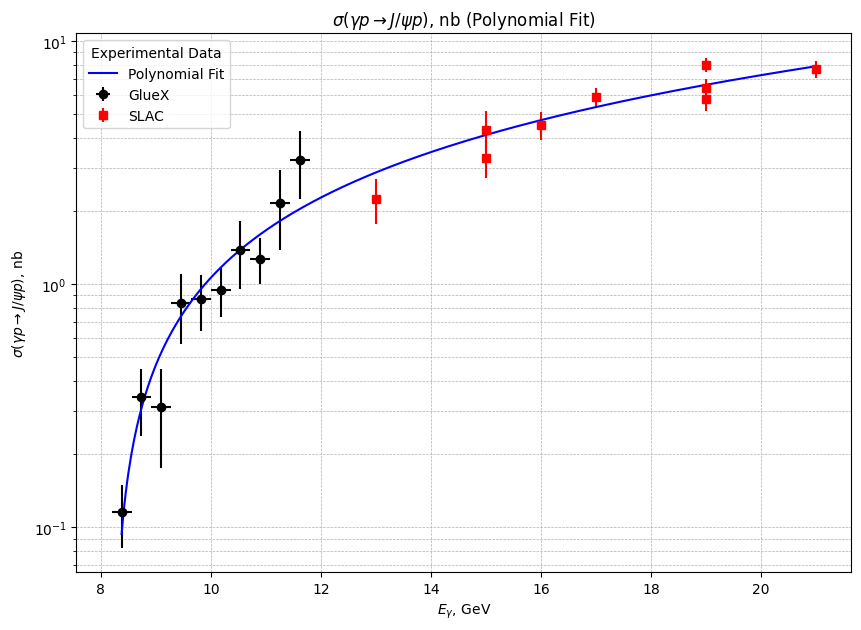

Polynomial Coefficients: [ 1.68384282e-03  5.67059237e-01 -4.77621380e+00]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Data from the GlueX table
energy_bins = [
    (8.2, 8.56),
    (8.56, 8.92),
    (8.92, 9.28),
    (9.28, 9.64),
    (9.64, 10.0),
    (10.0, 10.36),
    (10.36, 10.72),
    (10.72, 11.08),
    (11.08, 11.44),
    (11.44, 11.8),
]
y_values = [0.116, 0.343, 0.313, 0.835, 0.868, 0.949, 1.383, 1.274, 2.158, 3.245]
stat_errors = [0.031, 0.067, 0.127, 0.194, 0.196, 0.187, 0.284, 0.206, 0.421, 0.928]
syst_errors = [0.013, 0.082, 0.052, 0.185, 0.109, 0.102, 0.323, 0.184, 0.657, 0.384]

x_gluex = [(low + high) / 2 for low, high in energy_bins]
xerr_gluex = [(high - low) / 2 for low, high in energy_bins]
yerr_gluex = [np.sqrt(stat**2 + syst**2) for stat, syst in zip(stat_errors, syst_errors)]

# Data from the SLAC table
x_slac = [13, 15, 15, 16, 17, 19, 19, 19, 21]
y_slac = [2.240, 3.304, 4.312, 4.515, 5.866, 5.750, 6.389, 7.986, 7.667]
yerr_slac = [0.472, 0.560, 0.840, 0.606, 0.543, 0.586, 0.586, 0.532, 0.630]

# Combine GlueX and SLAC data for fitting
x_combined = np.array(x_gluex + x_slac)
y_combined = np.array(y_values + y_slac)
yerr_combined = np.array(yerr_gluex + yerr_slac)

# Fit a polynomial of degree 2 (quadratic)
coefficients = np.polyfit(x_combined, y_combined, 2)
polynomial = np.poly1d(coefficients)

# Generate a smooth curve using the polynomial
x_fit = np.linspace(min(x_combined), max(x_combined), 500)
y_fit = polynomial(x_fit)

# Plot the data and the fit
plt.figure(figsize=(10, 7))

# Plot GlueX data
plt.errorbar(x_gluex, y_values, xerr=xerr_gluex, yerr=yerr_gluex, fmt='o', color='black', label='GlueX')

# Plot SLAC data
plt.errorbar(x_slac, y_slac, yerr=yerr_slac, fmt='s', color='red', label='SLAC')

# Plot the fitted curve
plt.plot(x_fit, y_fit, '-', color='blue', label='Polynomial Fit')

# Set the plot to log scale for the y-axis
plt.yscale('log')

# Add labels, title, and legend
plt.title(r'$\sigma(\gamma p \rightarrow J/\psi p)$, nb (Polynomial Fit)')
plt.xlabel(r'$E_\gamma$, GeV')
plt.ylabel(r'$\sigma(\gamma p \rightarrow J/\psi p)$, nb')
plt.legend(title="Experimental Data", loc='upper left')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Show the plot
plt.savefig("output_plot.pdf", format="pdf")
plt.show()

# Display the polynomial coefficients
print("Polynomial Coefficients:", coefficients)



